In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
import json

In [49]:
import os

# Define the groups of data you have
countries = ['US', 'Canada', 'Australia']
metadata_types = ['titles', 'years', 'months', 'bodyTexts']

all_country_dfs = []

for country in countries:
    path = f"wildfire_data/{country}_wildfires_1_dates/"
    country_data = {}
    for meta in metadata_types:
        file_name = f"{meta}.json" 
        
        if os.path.exists(path+file_name):
            with open(path+file_name, 'r') as f:
                content = json.load(f)
                first_key = next(iter(content))
                actual_list = content[first_key]
                country_data[meta] = pd.Series(actual_list)
    
    if country_data:
        df = pd.DataFrame(country_data)
        df['country'] = country  # Add a label so you can compare them later
        all_country_dfs.append(df)

# Stack all countries into one master table
master_df = pd.concat(all_country_dfs, ignore_index=True)

print(master_df['country'].value_counts())
master_df.to_csv('master_wildfire_data.csv', index=False)

country
US           50
Canada       50
Australia    50
Name: count, dtype: int64


<Axes: xlabel='years', ylabel='count'>

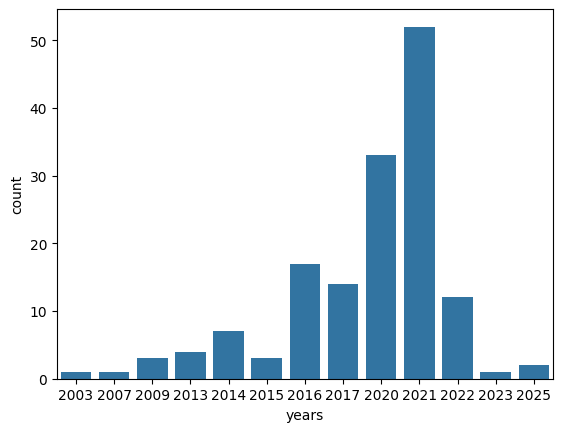

In [57]:
sorted_years = sorted(master_df['years'].unique())
sns.countplot(data=master_df, x='years', order=sorted_years)

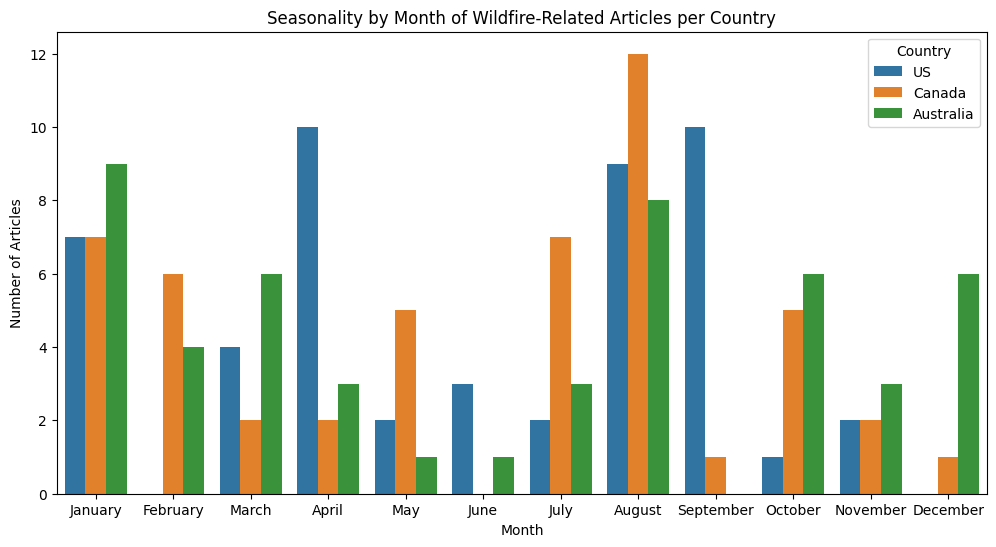

In [59]:
import calendar

# Map month numbers to month names
master_df['month_names'] = master_df['months'].map(lambda x: calendar.month_name[x])

# Create a count plot for seasonality by month, grouped by country
plt.figure(figsize=(12, 6))
sns.countplot(data=master_df, x='month_names', hue='country', order=calendar.month_name[1:])
plt.title('Seasonality by Month of Wildfire-Related Articles per Country')
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.legend(title='Country')
plt.show()

In [68]:
usa_data = master_df[master_df['country'] == 'US']
canada_data = master_df[master_df['country'] == 'Canada']
australia_data = master_df[master_df['country'] == 'Australia']

In [62]:
%pip install wordcloud
from wordcloud import WordCloud


[notice] A new release of pip is available: 25.3 -> 26.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [92]:
import re
import pandas as pd
from wordcloud import STOPWORDS
from collections import Counter

def process_text(text, extra_stopwords=None):
    text = re.sub(r'http\S+', '', text)  # remove urls
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove non-alphabetic characters
    text = text.lower()  # Convert to lowercase
    
    # Combined Stopwords
    stopwords = set(STOPWORDS)
    if extra_stopwords:
        stopwords.update(extra_stopwords)
        
    text = ' '.join(word for word in text.split() if word not in stopwords)
    return text

usa_raw = ' '.join(usa_data['bodyTexts'].dropna().tolist())
canada_raw = ' '.join(canada_data['bodyTexts'].dropna().tolist())
australia_raw = ' '.join(australia_data['bodyTexts'].dropna().tolist())


def get_top_50(text):
    return set(word for word, count in Counter(text.split()).most_common(50))

common_noise = get_top_50(usa_raw) & get_top_50(canada_raw) & get_top_50(australia_raw)
common_noise.update(['said', 'will', 'year', 'also']) 

# 3. Final Cleaned Text
usa_text = process_text(usa_raw, extra_stopwords=common_noise)
canada_text = process_text(canada_raw, extra_stopwords=common_noise)
australia_text = process_text(australia_raw, extra_stopwords=common_noise)

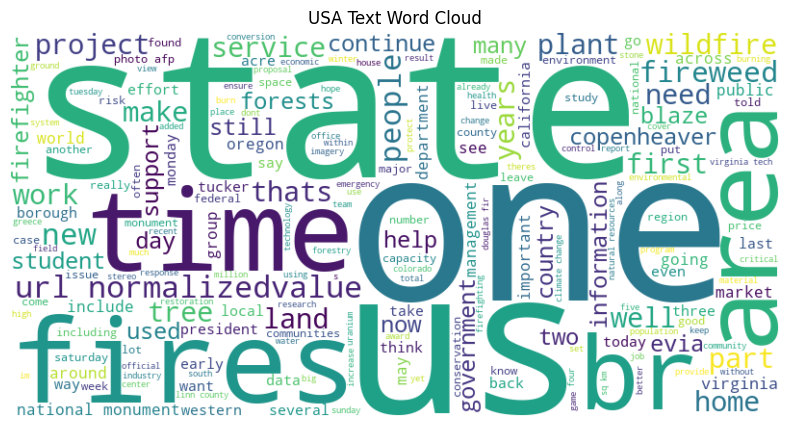

In [93]:
from wordcloud import WordCloud

usa_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(usa_text)

plt.figure(figsize=(10, 5))
plt.imshow(usa_wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.title("USA Text Word Cloud")
plt.show()

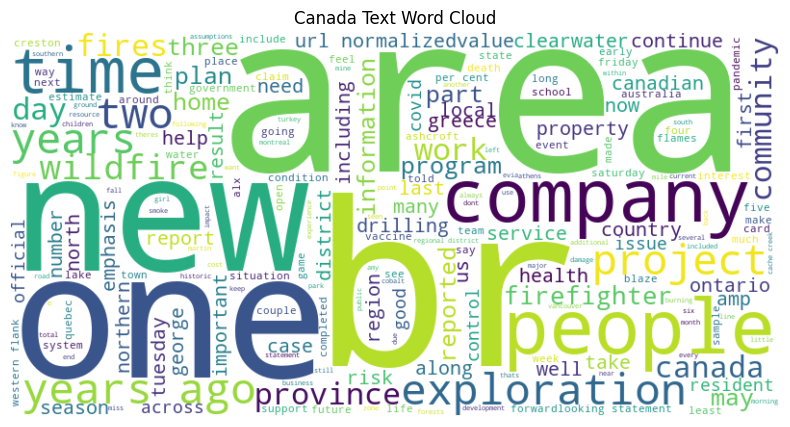

In [94]:
canada_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(canada_text)

plt.figure(figsize=(10, 5))
plt.imshow(canada_wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.title("Canada Text Word Cloud")
plt.show()

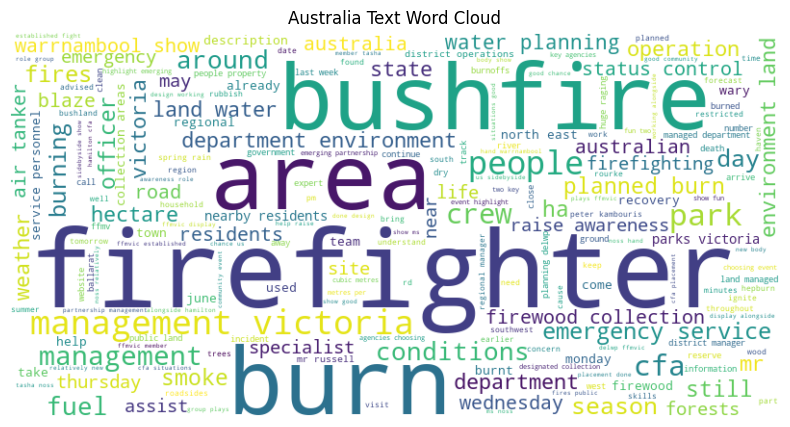

In [95]:
australia_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(australia_text)

plt.figure(figsize=(10, 5))
plt.imshow(australia_wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.title("Australia Text Word Cloud")
plt.show()